In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Covid_deaths.csv",parse_dates =["Date"])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [4]:
len(df["Country"].unique())

188

In [5]:
df.shape

(23688, 5)

In [6]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [7]:
# checking for null values

df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [8]:
# coverting categorical to numerical data

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df[["Country"]] = df[["Country"]].apply(label_encoder.fit_transform)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0


In [9]:
# Correlation

df.corr()

,Country,Confirmed,Recovered,Deaths
Country,1.000000,0.069204,0.019298,0.064954
Confirmed,0.069204,1.000000,0.810991,0.929718
Recovered,0.019298,0.810991,1.000000,0.778094
Deaths,0.064954,0.929718,0.778094,1.000000


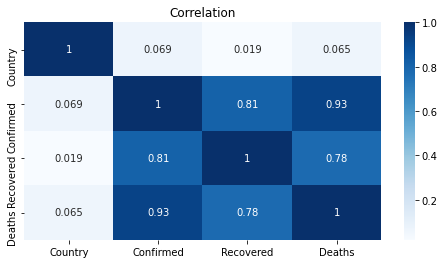

In [10]:
# Visualizing correlation

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Blues')


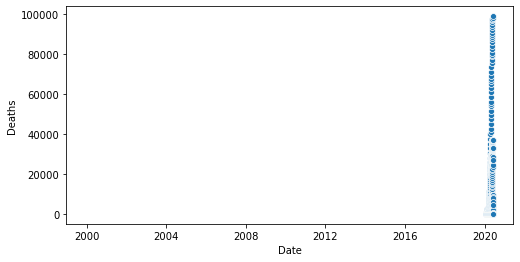

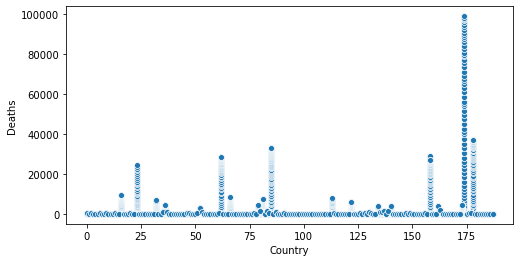

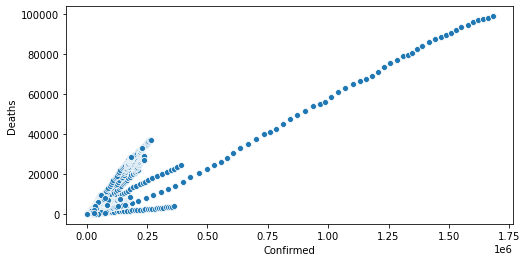

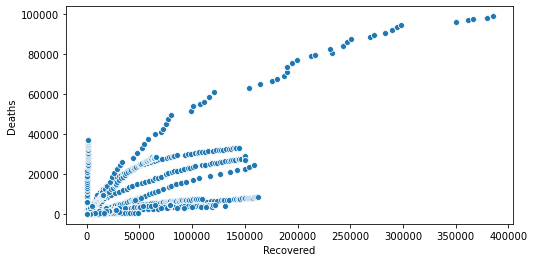

In [11]:
# Looking at scatterplots

x = df.drop("Deaths",axis=1)

collist = x.columns.values

for i in range(len(collist)):
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df[collist[i]],y = df["Deaths"])
    plt.show()
    


In [12]:
df.drop("Date",axis=1,inplace=True)

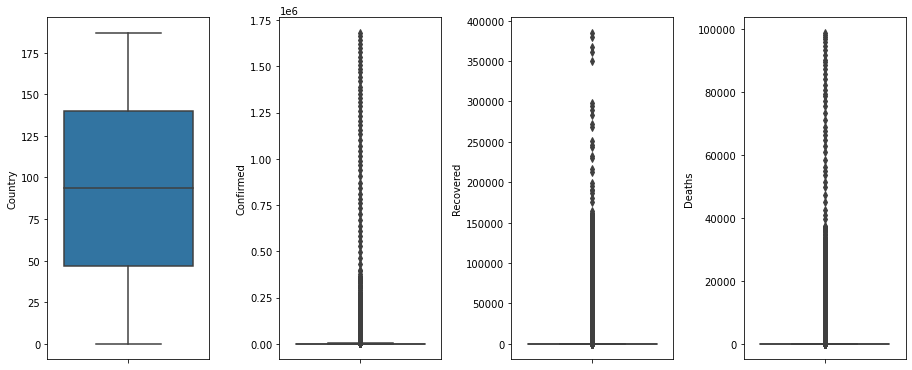

In [13]:
# Checking for outliers using boxplot

collist = df.columns.values
ncol = 5
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()

In [14]:
#Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


In [15]:
df_new.shape

(23177, 4)

In [16]:
df.shape

(23688, 4)

In [17]:
df = df_new

In [18]:
# Skewness

df.skew()

Country     -0.005144
Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64

In [19]:
for col in df[["Confirmed",'Recovered','Deaths']]:
    df[col]= np.log(df[col]+1)
    
df.skew()

Country     -0.005144
Confirmed    0.473662
Recovered    0.944097
Deaths       1.461751
dtype: float64

In [20]:
for col in df[["Recovered",'Deaths']]:
    df[col]=np.log(df[col]+1)
    
df.skew()

Country     -0.005144
Confirmed    0.473662
Recovered    0.364613
Deaths       0.762200
dtype: float64

In [21]:
df["Deaths"]=np.log(df["Deaths"]+1)
df.skew()

Country     -0.005144
Confirmed    0.473662
Recovered    0.364613
Deaths       0.543670
dtype: float64

In [22]:
# Splitting independent variables and target

x = df.drop('Deaths',axis=1)
print(x.head())
y = df[['Deaths']]
print("\n")
print(y.head())

   Country  Confirmed  Recovered
0        0        0.0        0.0
1        1        0.0        0.0
2        2        0.0        0.0
3        3        0.0        0.0
4        4        0.0        0.0


   Deaths
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0


In [23]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2
0,-1.720424,-1.030702,-0.941445
1,-1.701984,-1.030702,-0.941445
2,-1.683544,-1.030702,-0.941445
3,-1.665105,-1.030702,-0.941445
4,-1.646665,-1.030702,-0.941445


In [24]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [27]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print(m, "model")
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print("\n")

LinearRegression() model
0.8392509608594694
0.829767315115985
0.03167777085575972


SVR() model
0.8623136644961387
0.8466853479889497
0.028529576553090238


DecisionTreeRegressor() model
0.9994777147510107
0.9596226601191474
0.007513622436151113


KNeighborsRegressor() model
0.9710768630509387
0.948330369012261
0.009614949865511715




In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print("mean squared error",mean_squared_error(y_test,predrf))
print("r2 score",r2_score(y_test,predrf))

mean squared error 0.004930147502366383
r2c score 0.9735059562737682


In [29]:
#cross_val_score

from sklearn.model_selection import cross_val_score

model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),rf]

for m in model:
    print("For",m ,cross_val_score(m,x,y,cv=15,scoring = "r2").mean())

For LinearRegression() 0.48740944318286833
For SVR() 0.54627628159043
For DecisionTreeRegressor() 0.7262223100529716
For KNeighborsRegressor() 0.7133098743695564
For RandomForestRegressor() 0.8319847919389324


In [30]:
# saving the model - rf

import joblib

joblib.dump(rf,"rf_covid_deaths.pkl")

['rf_covid_deaths.pkl']